# **Ensemble Family - Boosting**

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

In [6]:
df = sns.load_dataset('diamonds')

In [7]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
df['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [10]:
df['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [13]:
# split the data into X and y
X = df.drop('cut', axis=1)
y = df['cut']

# encode the input variables
le = LabelEncoder()
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])

# endoe the target variable 
le = LabelEncoder()
y = le.fit_transform(y)

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
%%time
# train the decision tree model 
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# predict the test data
y_pred1 = dt.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred1))
print('Precision score: ', precision_score(y_test, y_pred1, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred1, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred1, average='micro'))

Accuracy score:  0.7194104560622915
Precision score:  0.7194104560622915
Recall score:  0.7194104560622915
F1 score:  0.7194104560622914
CPU times: total: 828 ms
Wall time: 847 ms


In [16]:
%%time 
# train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# predict the test data
y_pred2 = rf.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred2))
print('Precision score: ', precision_score(y_test, y_pred2, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred2, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred2, average='micro'))

Accuracy score:  0.7870782350760104
Precision score:  0.7870782350760104
Recall score:  0.7870782350760104
F1 score:  0.7870782350760104
CPU times: total: 24 s
Wall time: 28.7 s


In [17]:
%%time 
# train the xgboost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# predict the test data
y_pred3 = xgb.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred3))
print('Precision score: ', precision_score(y_test, y_pred3, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred3, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred3, average='micro'))

Accuracy score:  0.8056173526140156
Precision score:  0.8056173526140156
Recall score:  0.8056173526140156
F1 score:  0.8056173526140155
CPU times: total: 11.6 s
Wall time: 4.22 s


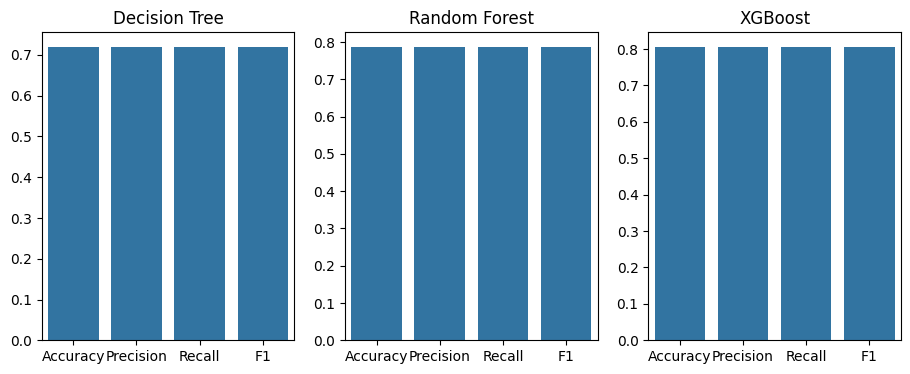

In [19]:
# make a bar plot showing each of the matrix with respect to the model
plt.figure(figsize=(15, 4))
plt.subplot(1, 4, 1)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred1), precision_score(y_test, y_pred1, average='micro'), recall_score(y_test, y_pred1, average='micro'), f1_score(y_test, y_pred1, average='micro')])
plt.title('Decision Tree')
plt.subplot(1, 4, 2)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred2), precision_score(y_test, y_pred2, average='micro'), recall_score(y_test, y_pred2, average='micro'), f1_score(y_test, y_pred2, average='micro')])
plt.title('Random Forest')
plt.subplot(1, 4, 3)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred3), precision_score(y_test, y_pred3, average='micro'), recall_score(y_test, y_pred3, average='micro'), f1_score(y_test, y_pred3, average='micro')])
plt.title('XGBoost')
# plt.tight_layout()
plt.show()